<a href="https://colab.research.google.com/github/Lakxz/PRODIGY_DS_01/blob/main/PRODIGY_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bank-additional-full.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df['y'].value_counts()

,count
y,
no,36548
yes,4640


In [5]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False


In [6]:
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=6,
    random_state=42
)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [9]:
y_pred = dt_model.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9156348628307842


In [11]:
confusion_matrix(y_test, y_pred)

array([[7037,  266],
       [ 429,  506]])

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      0.96      0.95      7303
        True       0.66      0.54      0.59       935

    accuracy                           0.92      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.92      0.91      8238



In [13]:
feature_importance = pd.Series(
    dt_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)
feature_importance.head(10)

,0
duration,0.496451
nr.employed,0.339935
euribor3m,0.044583
pdays,0.039442
cons.conf.idx,0.032824
month_oct,0.014149
cons.price.idx,0.009412
age,0.008288
contact_telephone,0.003422
day_of_week_mon,0.002330


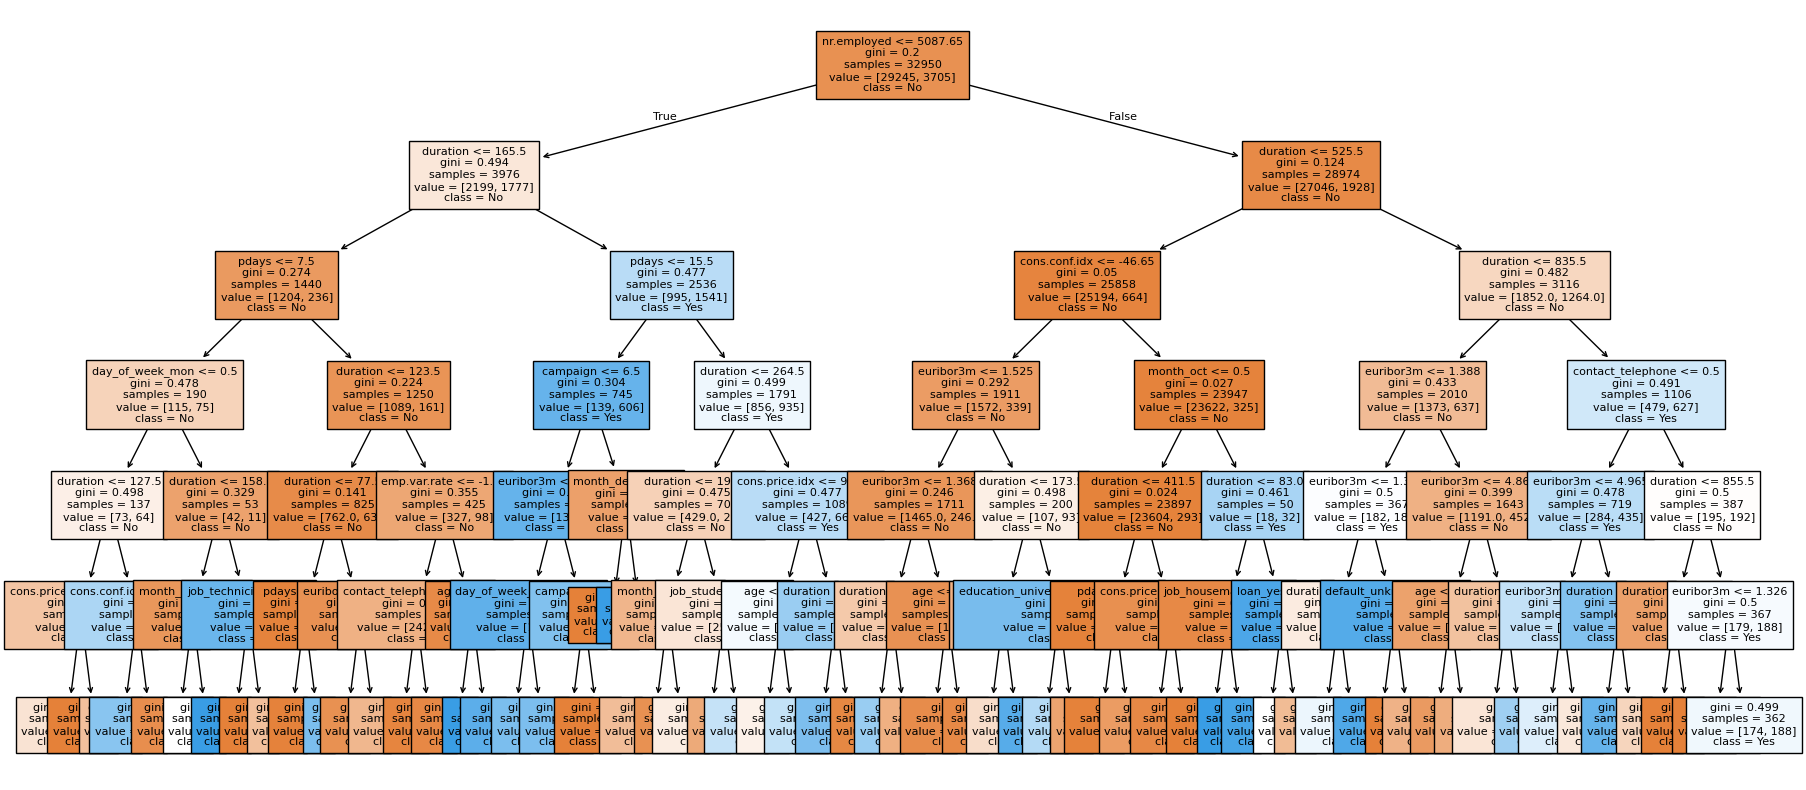

In [14]:
from sklearn.tree import plot_tree

plt.figure(figsize=(22,10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    fontsize=8
)
plt.show()